In [1]:
# important Library are imported and installed
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics

from sklearn.preprocessing import OneHotEncoder, LabelEncoder

# pip install tensorflow
import tensorflow as tf
import keras
from keras import layers

from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score

In [2]:
# the file is loaded 
# # I encountered an error loading the csv file 
# due to characters in the csv file 
# which can't be decoded using the utf-8 encoding, 
# a default encoding when using pandas. 
# However, it was solved by adding encoding='ISO-8859-1'
# I chose to use above encoding because the 
# the dataset looks related to European dataset
df = pd.read_csv("car_purchasingNew.csv", encoding='ISO-8859-1')

In [3]:
df.head()

,customer name,JobTitle,customer e-mail,country,gender,age,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,credit card debt,net worth,car purchase amount
0,Martina Avila,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,cubilia.Curae.Phasellus@quisaccumsanconvallis.edu,Bulgaria,0,42,167411.18,0.00,400184.25,NaN,567595.43,567595.43,11609.380910,238961.2505,35321.45877
1,Harlan Barnes,CAPTAIN III (POLICE DEPARTMENT),eu.dolor@diam.co.uk,Belize,0,41,155966.02,245131.88,137811.38,NaN,538909.28,538909.28,9572.957136,530973.9078,45115.52566
2,Naomi Rodriquez,CAPTAIN III (POLICE DEPARTMENT),vulputate.mauris.sagittis@ametconsectetueradip...,Algeria,1,43,212739.13,106088.18,16452.60,NaN,335279.91,335279.91,11160.355060,638467.1773,42925.70921
3,Jade Cunningham,WIRE ROPE CABLE MAINTENANCE MECHANIC,malesuada@dignissim.com,Cook Islands,1,58,77916.00,56120.71,198306.90,NaN,332343.61,332343.61,14426.164850,548599.0524,67422.36313
4,Cedric Leach,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",felis.ullamcorper.viverra@egetmollislectus.net,Brazil,1,57,134401.60,9737.00,182234.59,NaN,326373.19,326373.19,5358.712177,560304.0671,55915.46248


In [4]:
# this code shows the title columns
df.columns

Index(['customer name', 'JobTitle', 'customer e-mail', 'country', 'gender',
       'age', 'BasePay', 'OvertimePay', 'OtherPay', 'Benefits', 'TotalPay',
       'TotalPayBenefits', 'credit card debt', 'net worth',
       'car purchase amount'],
      dtype='object')

In [5]:
# I checked if the dataset has any duplicate
# or not
# obviously the dataset looks promising
# as it has zero duplicate
df.duplicated().sum()

0

In [6]:
# Then the sum of missing values (NaNs) 
# in each column of the DataFrame df is calculated. 
# This is to make sure I am working 
# with a good clean dataset 
# which can have significant effect 
# on the performance of the model.
df.isna().sum()

customer name            0
JobTitle                 0
customer e-mail          0
country                  0
gender                   0
age                      0
BasePay                  0
OvertimePay              0
OtherPay                 0
Benefits               500
TotalPay                 0
TotalPayBenefits         0
credit card debt         0
net worth                0
car purchase amount      0
dtype: int64

In [7]:
# I had error in the cell corr_matrix 
# which I think was due to the way 
# the columns name were named
df.rename(columns={'customer name': 'customer_name', 
                   'customer e-mail': 'customer_email',
                     'annual Salary': 'annual_Salary',
                       'credit card debt':'credit_card_debt', 'net worth': 'net_worth', 'car purchase amount':'car_purchase_amount'}, inplace=True)

In [8]:
# now reading the dataset
df.head()

,customer_name,JobTitle,customer_email,country,gender,age,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,credit_card_debt,net_worth,car_purchase_amount
0,Martina Avila,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,cubilia.Curae.Phasellus@quisaccumsanconvallis.edu,Bulgaria,0,42,167411.18,0.00,400184.25,NaN,567595.43,567595.43,11609.380910,238961.2505,35321.45877
1,Harlan Barnes,CAPTAIN III (POLICE DEPARTMENT),eu.dolor@diam.co.uk,Belize,0,41,155966.02,245131.88,137811.38,NaN,538909.28,538909.28,9572.957136,530973.9078,45115.52566
2,Naomi Rodriquez,CAPTAIN III (POLICE DEPARTMENT),vulputate.mauris.sagittis@ametconsectetueradip...,Algeria,1,43,212739.13,106088.18,16452.60,NaN,335279.91,335279.91,11160.355060,638467.1773,42925.70921
3,Jade Cunningham,WIRE ROPE CABLE MAINTENANCE MECHANIC,malesuada@dignissim.com,Cook Islands,1,58,77916.00,56120.71,198306.90,NaN,332343.61,332343.61,14426.164850,548599.0524,67422.36313
4,Cedric Leach,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",felis.ullamcorper.viverra@egetmollislectus.net,Brazil,1,57,134401.60,9737.00,182234.59,NaN,326373.19,326373.19,5358.712177,560304.0671,55915.46248


In [9]:
df['car_purchase_amount'].max()

80000.0

In [10]:
df['car_purchase_amount'].min()

9000.0

In [11]:
# the idea here is to classify the price_range
# and to do that I have to choose the 
# car_purchase_amount as it 
# is best variable 
# Define the function to classify price ranges
def classify_price_range(car_purchase_amount):
    #if car_purchase_amount < 9000:
        #return 0
    if car_purchase_amount < 30000:
        return 1
    elif 30000 <= car_purchase_amount < 50000:
        return 2
    elif 50000 <= car_purchase_amount < 60000:
        return 3
    elif 60000 <= car_purchase_amount < 80000:
        return 4
    #else:
        #return 99999

# Apply the function to 'car_purchase_amount' column
df['price_range'] = df['car_purchase_amount'].apply(classify_price_range)

In [12]:
df.head()

,customer_name,JobTitle,customer_email,country,gender,age,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,credit_card_debt,net_worth,car_purchase_amount,price_range
0,Martina Avila,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,cubilia.Curae.Phasellus@quisaccumsanconvallis.edu,Bulgaria,0,42,167411.18,0.00,400184.25,NaN,567595.43,567595.43,11609.380910,238961.2505,35321.45877,2.0
1,Harlan Barnes,CAPTAIN III (POLICE DEPARTMENT),eu.dolor@diam.co.uk,Belize,0,41,155966.02,245131.88,137811.38,NaN,538909.28,538909.28,9572.957136,530973.9078,45115.52566,2.0
2,Naomi Rodriquez,CAPTAIN III (POLICE DEPARTMENT),vulputate.mauris.sagittis@ametconsectetueradip...,Algeria,1,43,212739.13,106088.18,16452.60,NaN,335279.91,335279.91,11160.355060,638467.1773,42925.70921,2.0
3,Jade Cunningham,WIRE ROPE CABLE MAINTENANCE MECHANIC,malesuada@dignissim.com,Cook Islands,1,58,77916.00,56120.71,198306.90,NaN,332343.61,332343.61,14426.164850,548599.0524,67422.36313,4.0
4,Cedric Leach,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",felis.ullamcorper.viverra@egetmollislectus.net,Brazil,1,57,134401.60,9737.00,182234.59,NaN,326373.19,326373.19,5358.712177,560304.0671,55915.46248,3.0


In [13]:
# removing the less needed columns
removables = ["customer_name", "JobTitle", "customer_email", "country", "Benefits"]

In [14]:
# here I filtered out the less important columns
df = df.drop(removables, axis=1)

In [15]:
df.head()

,gender,age,BasePay,OvertimePay,OtherPay,TotalPay,TotalPayBenefits,credit_card_debt,net_worth,car_purchase_amount,price_range
0,0,42,167411.18,0.00,400184.25,567595.43,567595.43,11609.380910,238961.2505,35321.45877,2.0
1,0,41,155966.02,245131.88,137811.38,538909.28,538909.28,9572.957136,530973.9078,45115.52566,2.0
2,1,43,212739.13,106088.18,16452.60,335279.91,335279.91,11160.355060,638467.1773,42925.70921,2.0
3,1,58,77916.00,56120.71,198306.90,332343.61,332343.61,14426.164850,548599.0524,67422.36313,4.0
4,1,57,134401.60,9737.00,182234.59,326373.19,326373.19,5358.712177,560304.0671,55915.46248,3.0


In [16]:
# here i needed to be sure that
# there are no non-numeric 
# zero values 
# and also then replace with NaN value
# which then concert into integer
# Step 1: Replace non-numeric and 0 values with NaN
df['price_range'] = pd.to_numeric(df['price_range'], errors='coerce')
df['price_range'].replace(0, np.nan, inplace=True)

# Step 2: Fill NaN values with 1
df['price_range'].fillna(1, inplace=True)

# Step 3: Convert the column to integers
df['price_range'] = df['price_range'].astype(int)


C:\Users\Admin\AppData\Local\Temp\ipykernel_16540\2410731039.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['price_range'].replace(0, np.nan, inplace=True)
C:\Users\Admin\AppData\Local\Temp\ipykernel_16540\2410731039.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For 

In [17]:
# this is to ascertain 
# the true highest value 
# of the price_range 
# after conversion into class
df['price_range'].max()

4

In [18]:
# this is to ascertain 
# the true lowest value 
# of the price_range 
# after conversion into class
print(df['price_range'].min())


1


In [19]:
# this code helps to confirm 
# that I have the exact number of class
# in the dataset (price_range)
unique_values = df['price_range'].unique()
unique_values_sorted = sorted(unique_values)
print(unique_values_sorted)

[1, 2, 3, 4]


In [20]:
# here in this code I defined 
# price_range into 4 classes and then categorize
df['price_range'] = df['price_range'].replace({1: "1: Cheap", 2: "2: Avg-", 3: "3: Avg+", 4: "4: Expensive"})

 X/y:variables, and then encode the target variable

In [21]:
from sklearn.preprocessing import LabelEncoder
import tensorflow as tf

# Convert all values in the price_range column to integers
df['price_range'] = df['price_range'].astype(str)

# Everything else except the target variable
X = df.drop("price_range", axis=1)

# Have only the target variable here (dependent variable)
y_temp = df['price_range']

# Apply LabelEncoder
le = LabelEncoder()
y_enc = le.fit_transform(y_temp)

# Convert the label into a matrix form
y = tf.keras.utils.to_categorical(y_enc)


In [22]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

# convert all continuous variables to integer,
# and convert all negative numbers to 0
# I used the SelectKBest which is a variable/feature selector 
# (feature selection method)
# helps select the highly important variables which is related
# according to how their scoring features function. 
# Also, it showed the scores in descending form of order. 
# in this ann classification analysis
# The information given by the outcome showed 
# that the features that has higher scores 
# and reveal the higher the feature score the highly important the feature is, 
# and in this classification according 
# to the highest score are networth,
# annual_Salary, credit_card_debt,
# age and gender the least feature score
X_cat = X.astype(int)
X_cat = X_cat.clip(lower=0)

# The chi-squared test showed the statistical test 
# which reveal the key factor or connection 
# between the category variables. 
# The test shows the frequencies of the category variables 
# and compared it to the expected frequency independently in this case . 
# Then indicated by measuring the dependency 
# between each feature and the target variable 
# which in this the 'quality' of the wine. 
# And, the higher chi-squared scores reveal there is 
# more correlations between the features (variables) and the targeted variable.
chi_2_features = SelectKBest(chi2, k=len(X_cat.columns))

# fit our data to the SelectKBest
best_features = chi_2_features.fit(X_cat,y.astype(int))

# use decimal format in table print later
pd.options.display.float_format = '{:.2f}'.format

# wrap it up, and show the results
# the higher the score, the more effect that column has on price
df_features = pd.DataFrame(best_features.scores_)
df_columns = pd.DataFrame(X_cat.columns)
f_scores = pd.concat([df_columns,df_features],axis=1)
f_scores.columns = ['Features','Score']
f_scores.sort_values(by='Score',ascending=False)

,Features,Score
8,net_worth,6078896.41
9,car_purchase_amount,984827.68
3,OvertimePay,302845.94
2,BasePay,105316.73
4,OtherPay,67336.63
5,TotalPay,3101.29
6,TotalPayBenefits,3101.29
7,credit_card_debt,1825.71
1,age,222.24
0,gender,0.74


 Building the neural network

In [23]:
 # the usual train/validation/test -split
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.30)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5)

In [24]:
# here I printed out the categories 
# just the way I want it to look
# when seaborne and Classification_report
categories = list(np.unique(df['price_range']))
print(categories)

['1: Cheap', '2: Avg-', '3: Avg+', '4: Expensive']


In [25]:
# a version neural network
# I had issues with the l1 
# which I optimized by removing it 
# and it worked 
# no optimizations, probably not going to work well
model = keras.Sequential(
    [
        layers.BatchNormalization(input_shape=(len(X.columns),)),
        layers.Dense(16, activation="relu", kernel_regularizer=keras.regularizers.l1(0.1)),
        layers.Dense(32, activation="relu"),
        layers.Dropout(0.2),
        layers.Dense(8, activation="relu"),
        layers.Dense(len(categories), activation="softmax")
    ]
)


# compile the model, this time we use categorical crossentropy for loss -function
# and we also measure the accuracy of our model in the metrics
model.compile(optimizer="adam", loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

c:\Users\Admin\DeepLearningSpringNew2024\.venv\lib\site-packages\keras\src\layers\normalization\batch_normalization.py:143: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ batch_normalization             │ (None, 10)             │            40 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 16)             │           176 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │           544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 8)              │           264 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 4)              │            36 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,060 (4.14 KB)

 Trainable params: 1,040 (4.06 KB)

 Non-trainable params: 20 (80.00 B)

In [26]:
# I chose 500 epochs for training my model 
model.fit(x=X_train, y=y_train, epochs=500, validation_data=(X_val, y_val))

Epoch 1/500


11/11 ━━━━━━━━━━━━━━━━━━━━ 4s 43ms/step - accuracy: 0.5379 - loss: 5.1418 - val_accuracy: 0.4800 - val_loss: 5.1267
Epoch 2/500
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.6516 - loss: 4.8853 - val_accuracy: 0.5867 - val_loss: 4.8152
Epoch 3/500
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6524 - loss: 4.6691 - val_accuracy: 0.6000 - val_loss: 4.6286
Epoch 4/500
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6434 - loss: 4.4865 - val_accuracy: 0.6000 - val_loss: 4.4655
Epoch 5/500
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6386 - loss: 4.3083 - val_accuracy: 0.6000 - val_loss: 4.2898
Epoch 6/500
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6981 - loss: 4.0453 - val_accuracy: 0.6000 - val_loss: 4.1344
Epoch 7/500
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6740 - loss: 3.9209 - val_accuracy: 0.6000 - val_loss: 3.9522
Epoch 8/500
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6418 - loss: 3.7493 - val_accuracy: 0.6000 - val_loss: 

<Axes: >

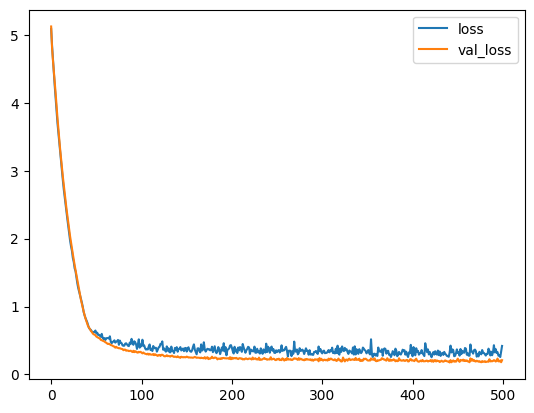

In [27]:
# the model 
# The curves showed that there is a good generalization 
# performance of the model
# means the model  is good and not overfitting or underfitting
# at around X at 40 - 50 and then stop learning
# # until the training loss starts to increase and continue to learn
loss_df = pd.DataFrame(model.history.history)
loss_df[['loss', 'val_loss']].plot()

<Axes: >

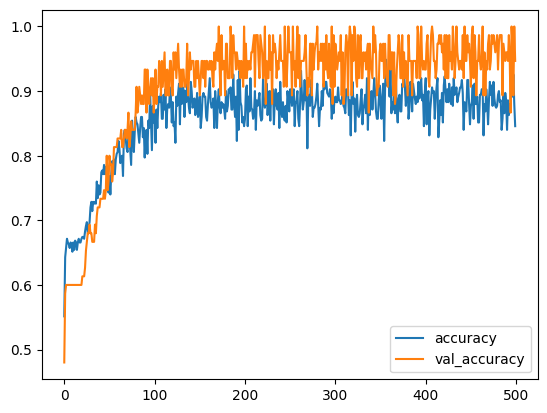

In [28]:
# the model accuracy
# shows a good accuracy for 
# both the training and validation accuracy
loss_df[['accuracy', 'val_accuracy']].plot()

In [29]:
# compare the final model loss/accuracy/evaluation values
# although the values should match in most case
# However, the data Evaluation 
# for each test and trainng still not bad
# because it's still somehow close to each other
print("Test data evaluation:")
print(model.evaluate(X_test, y_test, verbose=0))
print("\nTrain data evaluation:")
print(model.evaluate(X_train, y_train, verbose=0))

Test data evaluation:
[0.23801930248737335, 0.9333333373069763]

Train data evaluation:
[0.20423373579978943, 0.9628571271896362]


 Test Predictions and Classification Metrics

In [30]:
# And rhen the predictions are obtained 
# and convert with argmax() in other to get categories 
# instead of raw probabilities

# basically we are reverting the cross entropy
# format back to the original target variable format
# instead [0,1,0,0] => 0 or 1 or 2 or 3
test_predictions = model.predict(X_test)
test_predictions = np.argmax(test_predictions, axis=1)

# convert also y-test -values with argmax
y_test = np.argmax(y_test, axis=1)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


In [31]:
# y_test and test_predictions
# y_test

In [32]:
# test_predictions

In [33]:
df.head()

,gender,age,BasePay,OvertimePay,OtherPay,TotalPay,TotalPayBenefits,credit_card_debt,net_worth,car_purchase_amount,price_range
0,0,42,167411.18,0.00,400184.25,567595.43,567595.43,11609.38,238961.25,35321.46,2: Avg-
1,0,41,155966.02,245131.88,137811.38,538909.28,538909.28,9572.96,530973.91,45115.53,2: Avg-
2,1,43,212739.13,106088.18,16452.60,335279.91,335279.91,11160.36,638467.18,42925.71,2: Avg-
3,1,58,77916.00,56120.71,198306.90,332343.61,332343.61,14426.16,548599.05,67422.36,4: Expensive
4,1,57,134401.60,9737.00,182234.59,326373.19,326373.19,5358.71,560304.07,55915.46,3: Avg+


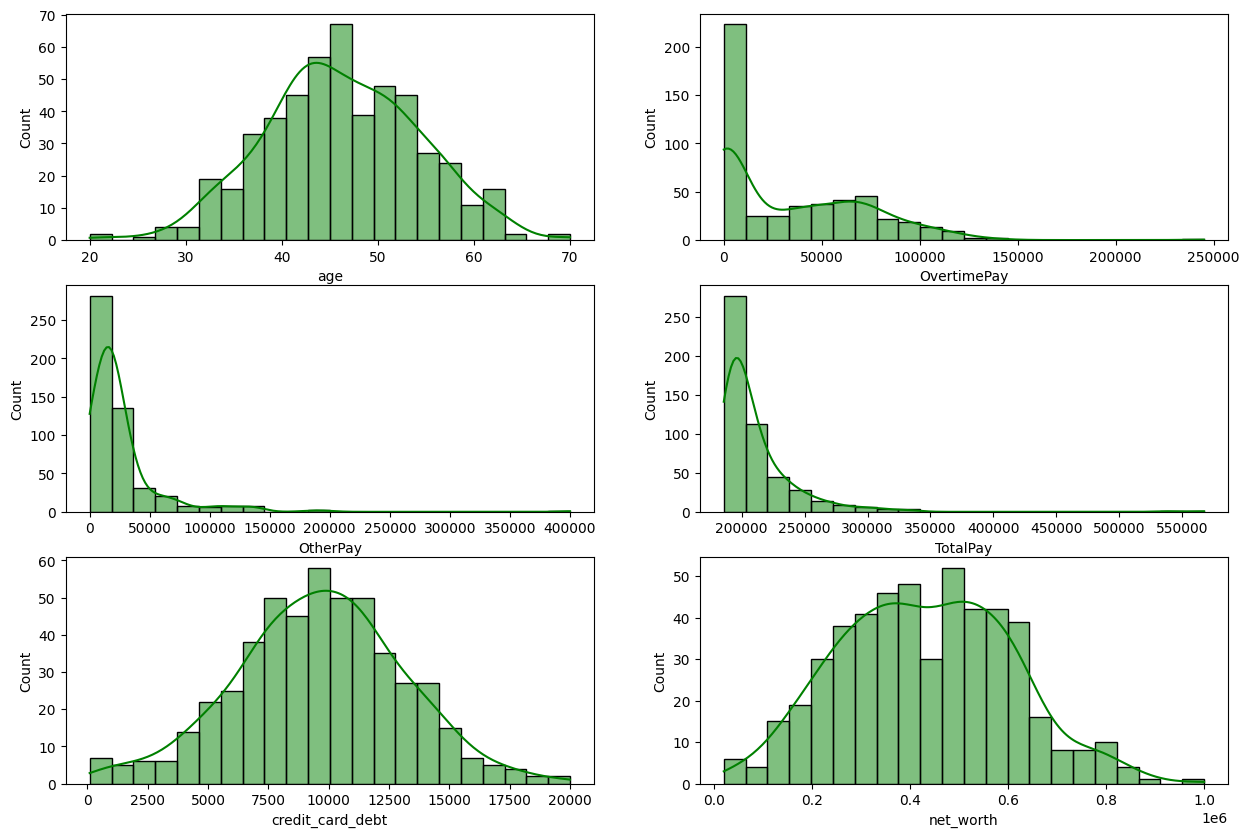

In [34]:
# the age, credit_card_debt and net_worth
# are significant than the other selected variables
neccessary_columns= ['age','OvertimePay','OtherPay', 'TotalPay','credit_card_debt','net_worth']
plt.figure(figsize=(15,10))
for i, col in enumerate (neccessary_columns):
    plt.subplot(3,2,i+1)
    sns.histplot(data=df, x= col, kde= True, bins= round(np.sqrt(len(df))), color= 'g')
    
plt.show()

<Axes: >

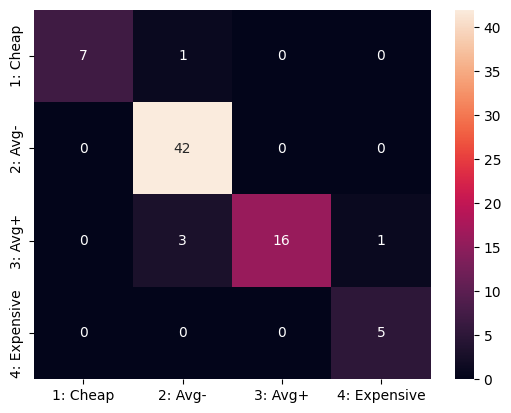

In [35]:
# you can also use the actual names for the categories
# there is very low mistakes amongs 
# the classes and this is so good
sns.heatmap(confusion_matrix(y_test, test_predictions), xticklabels=categories, yticklabels=categories, annot=True, fmt='g')

In [36]:
print(classification_report(y_test, test_predictions, target_names=categories))

# get overall accuracy of the model and print it
# the precision of score of each class is good
# especially 2: Avg-, 3: Avg+ and 4: Expensive
# 1: Cheap has a precision score too but not as others
# which I think it's not well represented in the data
# the recall and fi-score are high as well
# shows the model performance is topnotch 
acc = accuracy_score(y_test, test_predictions)
print("\nModel overall accuracy: {:.2f}%".format(acc * 100))






              precision    recall  f1-score   support

    1: Cheap       1.00      0.88      0.93         8
     2: Avg-       0.91      1.00      0.95        42
     3: Avg+       1.00      0.80      0.89        20
4: Expensive       0.83      1.00      0.91         5

    accuracy                           0.93        75
   macro avg       0.94      0.92      0.92        75
weighted avg       0.94      0.93      0.93        75


Model overall accuracy: 93.33%


In [37]:
# then I get the ROC-AUC -score
# The Receiver Operating Characteristic (ROC) 
# curve(ROC AUC score) for this 4 class Classification model. 
# y represent the true target labels in my dataset. 
# which when I printed it out It's a 1D array structure that has the true class labels
# the model.predict(X) predicted the class probabilities 
# the probabilities outcome was produced by 
# the model based on the each sample in the input data X
# the multi_class="ovr" parameter indicated the 
# method used in this Classification 
# it actually created for each of the class
# a binary classification, into positive and negative samples
# in overall, the classes ROC AUC scores calculated the and the average 
# which give the output 0.9972 
# that shows that the output indicates the 
# quality of the model's predictions of the classes
# this high score I think can make the model
# to effectively distinguish between the classes
# and high performance of the model.
# Meaning the model performs very 
# well in classifying the data across the 4 Classes
roc_auc_score(y, model.predict(X), multi_class="ovr")

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


0.9983927570509883

 A New Test Prediction

In [38]:
df.columns

Index(['gender', 'age', 'BasePay', 'OvertimePay', 'OtherPay', 'TotalPay',
       'TotalPayBenefits', 'credit_card_debt', 'net_worth',
       'car_purchase_amount', 'price_range'],
      dtype='object')

In [39]:
df.head()

,gender,age,BasePay,OvertimePay,OtherPay,TotalPay,TotalPayBenefits,credit_card_debt,net_worth,car_purchase_amount,price_range
0,0,42,167411.18,0.00,400184.25,567595.43,567595.43,11609.38,238961.25,35321.46,2: Avg-
1,0,41,155966.02,245131.88,137811.38,538909.28,538909.28,9572.96,530973.91,45115.53,2: Avg-
2,1,43,212739.13,106088.18,16452.60,335279.91,335279.91,11160.36,638467.18,42925.71,2: Avg-
3,1,58,77916.00,56120.71,198306.90,332343.61,332343.61,14426.16,548599.05,67422.36,4: Expensive
4,1,57,134401.60,9737.00,182234.59,326373.19,326373.19,5358.71,560304.07,55915.46,3: Avg+


In [40]:
# Now I try to test with some different imaginary data
# I did modify the data based on my dataset
# trying different data 
# I noticed age plays a big factor
# younger age associated to low price
# while old age associated to high 
# Expensive cars
# I think gender literally has 
# significant but I 
# decided to have as part of the variables 
# in order to enhance the training model (data)
tester_row = {
    'gender': 0, 
    'age': 45,
    'BasePay': 250000, 
    'OvertimePay': 100000, 
    'OtherPay': 160000, 
    'TotalPay': 400000,
    'TotalPayBenefits': 600000,
    'credit_card_debt': 90000, 
    'net_worth': 600000, 
    'car_purchase_amount': 250000, 
}

# convert to pandas-format
tester_row = pd.DataFrame([tester_row])
result = model.predict(tester_row)[0]
print(result.round(3))

result_index = np.argmax(result)
print(result_index)

# print the actual name with this index
result_text = categories[result_index]

# print the result
print(f"Predicted price range: {result_text}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 453ms/step
[0.    0.    0.004 0.996]
3
Predicted price range: 4: Expensive


In [41]:
# I save the model to a file named carpurchaseprice in 
# keras format
# which I will use for userapp.py 
model.save("carpurchaseprice.keras")